<a href="https://colab.research.google.com/github/ENG19CS0334-TEJAAL-M/AI-ML/blob/main/SEM1/ML/EnsembleTechnique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

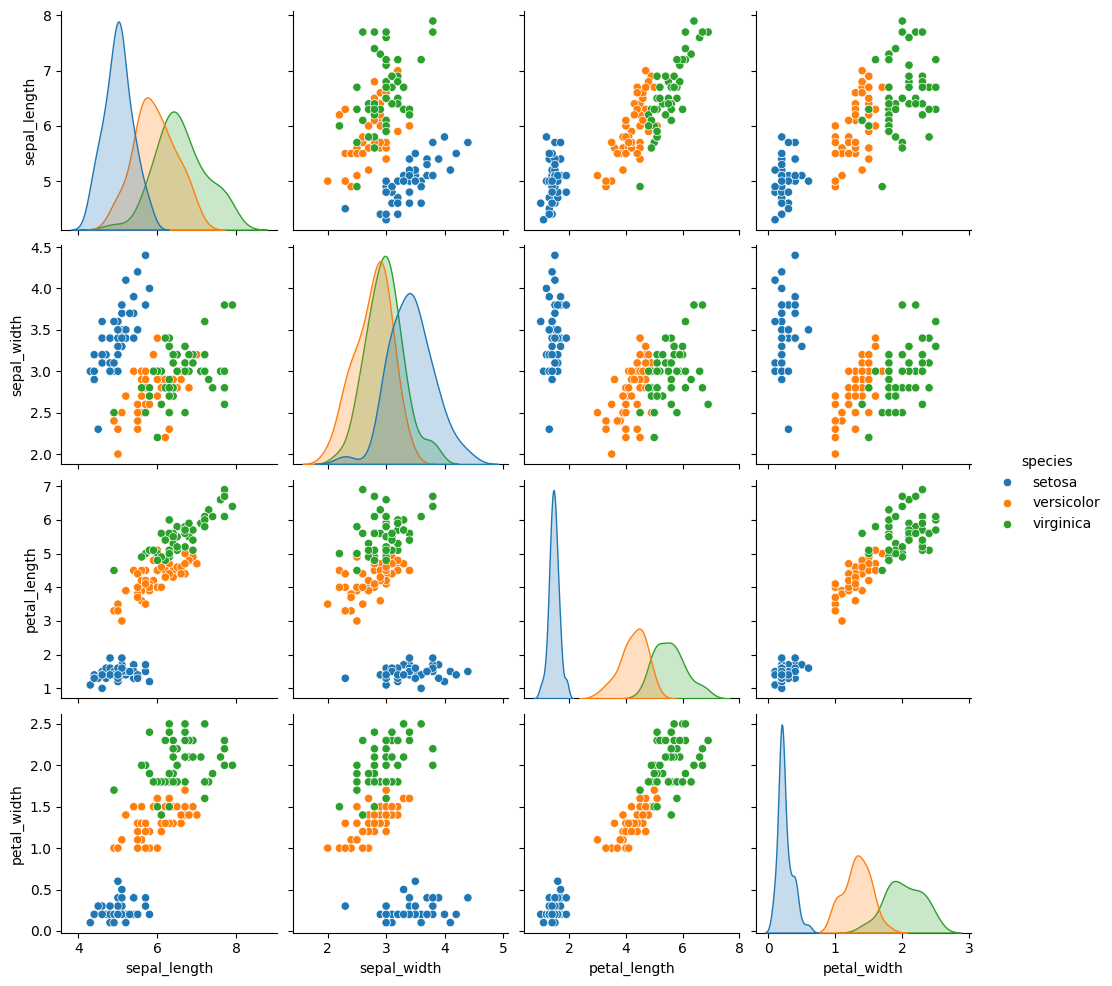

In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Visualizing the data distribution using pairplot
sns.pairplot(sns.load_dataset('iris'), hue='species')
plt.show()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

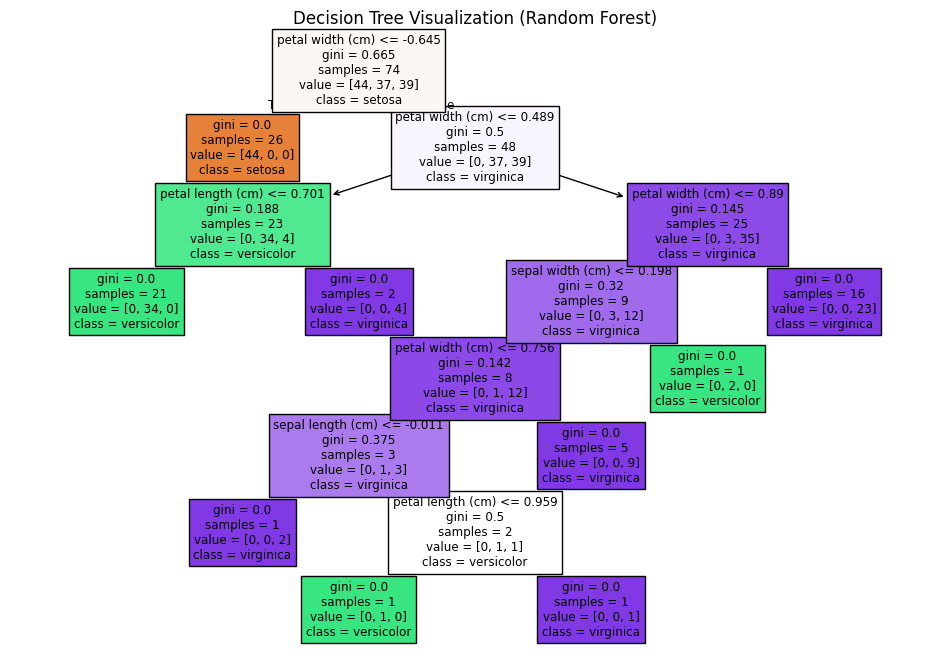

In [3]:
# Decision tree base model visualisation
from sklearn.tree import plot_tree
# Random Forest (Bagging Technique)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Plot a single tree from Random Forest
plt.figure(figsize=(12, 8))
plot_tree(rf_model.estimators_[0], feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree Visualization (Random Forest)")
plt.show()

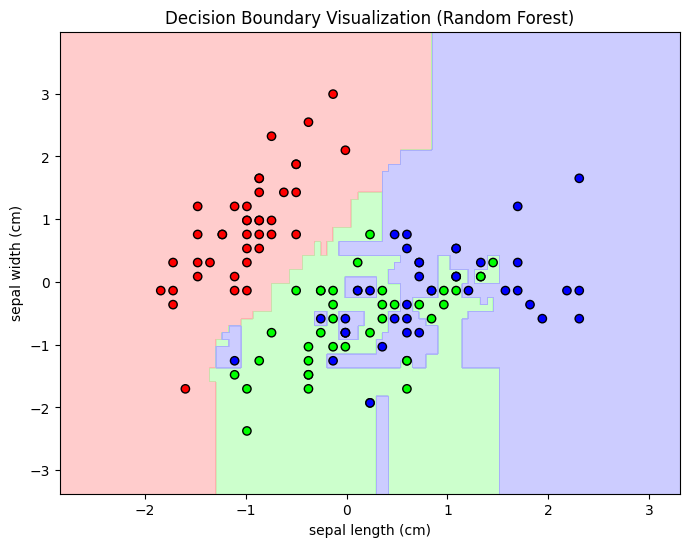

In [4]:
# Decision Tree boundary visualisation
from matplotlib.colors import ListedColormap
import numpy as np

# Reduce to 2 features for visualization
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Train a new Random Forest on 2 features
rf_model_2d = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_2d.fit(X_train_2d, y_train)

# Create a mesh grid
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on the grid
Z = rf_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.6, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Decision Boundary Visualization (Random Forest)")
plt.show()


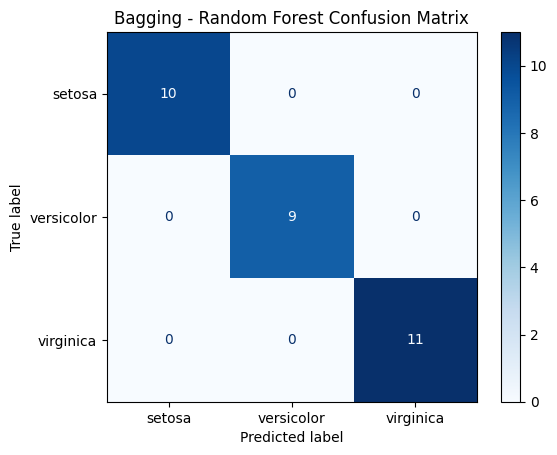

In [5]:
# Random Forest (Bagging Technique)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Plot confusion matrix
rf_predictions = rf_model.predict(X_test)
cm = confusion_matrix(y_test, rf_predictions)
ConfusionMatrixDisplay(cm, display_labels=data.target_names).plot(cmap='Blues')
plt.title('Bagging - Random Forest Confusion Matrix')
plt.show()

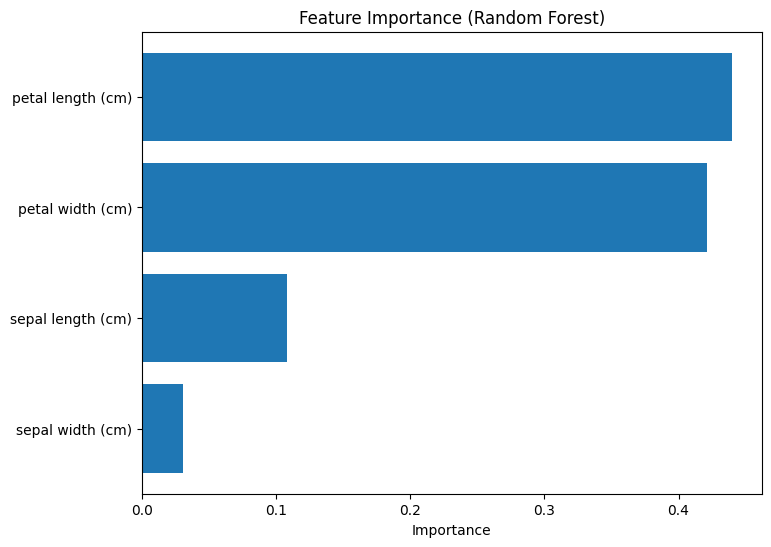

In [7]:
# Checking on feature importance
import numpy as np
feature_importances = rf_model.feature_importances_
features = data.feature_names
indices = np.argsort(feature_importances)

plt.figure(figsize=(8, 6))
plt.title("Feature Importance (Random Forest)")
plt.barh(range(len(features)), feature_importances[indices], align="center")
plt.yticks(range(len(features)), np.array(features)[indices])
plt.xlabel("Importance")
plt.show()


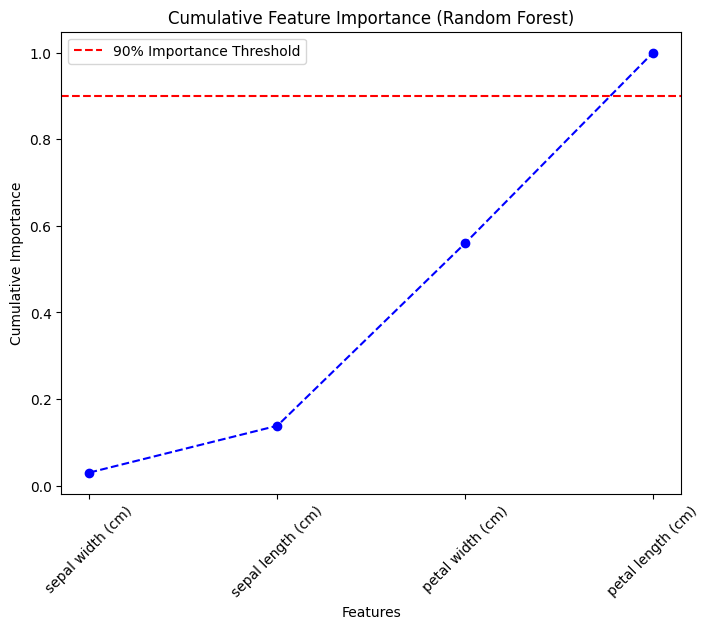

In [8]:
# Cumulative feature importance
# Shows the cumulative contribution of the most important features to
# illustrate how many features contribute to the model's performance.
cumulative_importance = np.cumsum(feature_importances[indices])

plt.figure(figsize=(8, 6))
plt.plot(range(len(features)), cumulative_importance, marker='o', linestyle='--', color='b')
plt.xticks(range(len(features)), np.array(features)[indices], rotation=45)
plt.xlabel("Features")
plt.ylabel("Cumulative Importance")
plt.title("Cumulative Feature Importance (Random Forest)")
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Importance Threshold')
plt.legend()
plt.show()


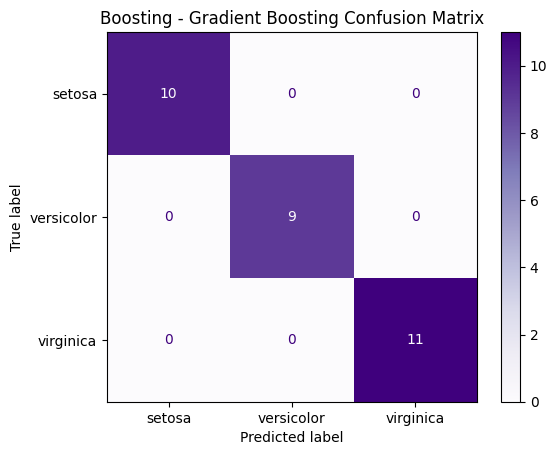

In [9]:
#Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Plot confusion matrix
gb_predictions = gb_model.predict(X_test)
cm = confusion_matrix(y_test, gb_predictions)
ConfusionMatrixDisplay(cm, display_labels=data.target_names).plot(cmap='Purples')
plt.title('Boosting - Gradient Boosting Confusion Matrix')
plt.show()

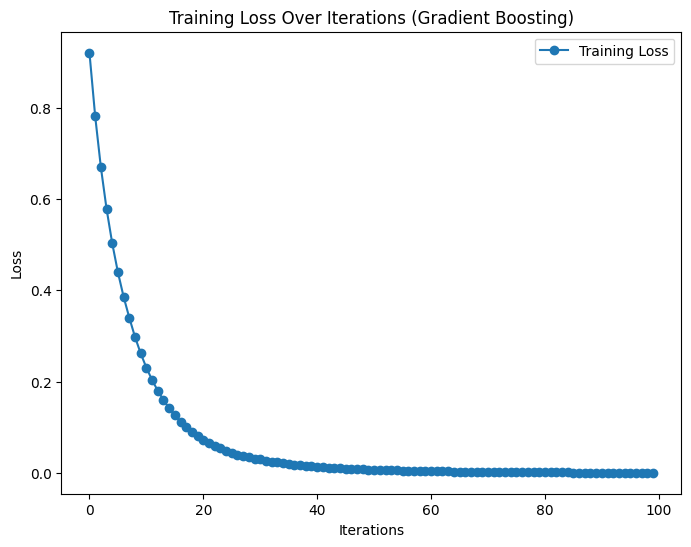

In [10]:
# Check if training loss decreases over iterations
plt.figure(figsize=(8, 6))
plt.plot(gb_model.train_score_, marker='o', label='Training Loss')
plt.title("Training Loss Over Iterations (Gradient Boosting)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


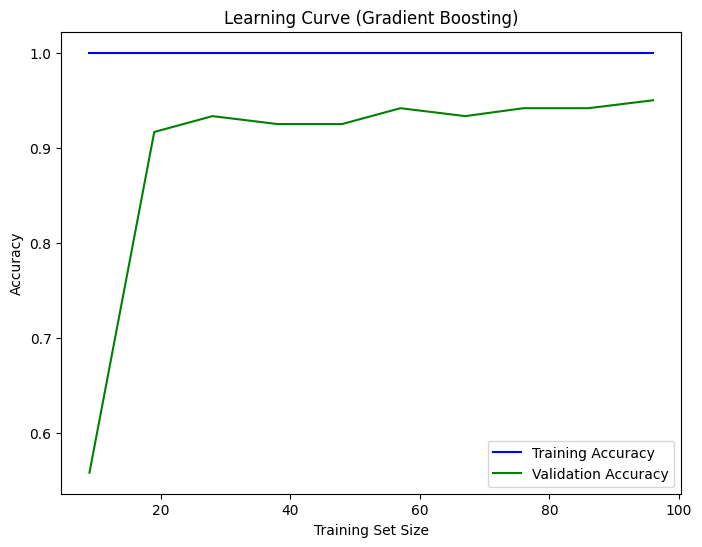

In [11]:
# Check if learning curve improves
from sklearn.model_selection import learning_curve

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    gb_model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='b')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='g')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Gradient Boosting)")
plt.legend()
plt.show()


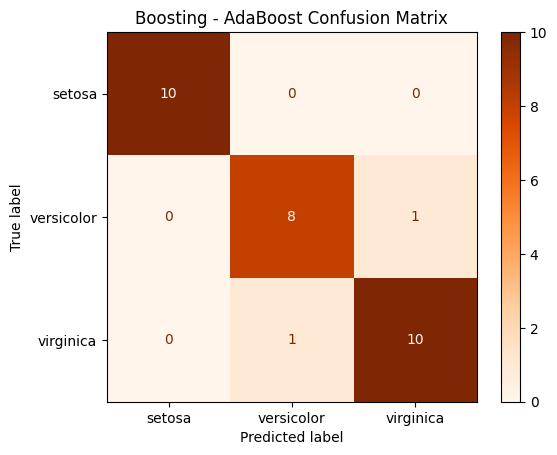

In [ ]:
# AdaBoost (Boosting Technique)
from sklearn.ensemble import AdaBoostClassifier

# Train an AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Plot confusion matrix
ada_predictions = ada_model.predict(X_test)
cm = confusion_matrix(y_test, ada_predictions)
ConfusionMatrixDisplay(cm, display_labels=data.target_names).plot(cmap='Oranges')
plt.title('Boosting - AdaBoost Confusion Matrix')
plt.show()

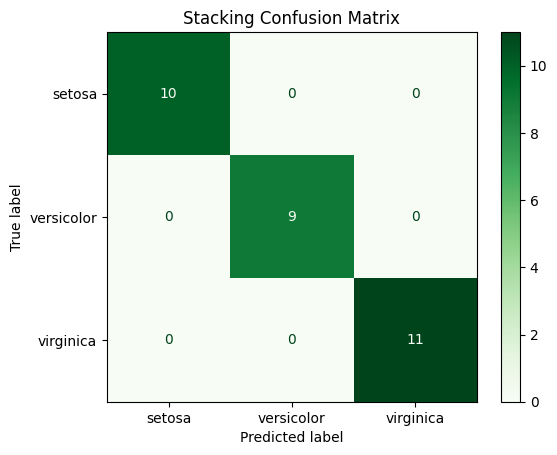

In [ ]:
# Stacking
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Base models for stacking
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC(probability=True))
]

# Meta-model for stacking
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_model.fit(X_train, y_train)

# Plot confusion matrix
stack_predictions = stack_model.predict(X_test)
cm = confusion_matrix(y_test, stack_predictions)
ConfusionMatrixDisplay(cm, display_labels=data.target_names).plot(cmap='Greens')
plt.title('Stacking Confusion Matrix')
plt.show()

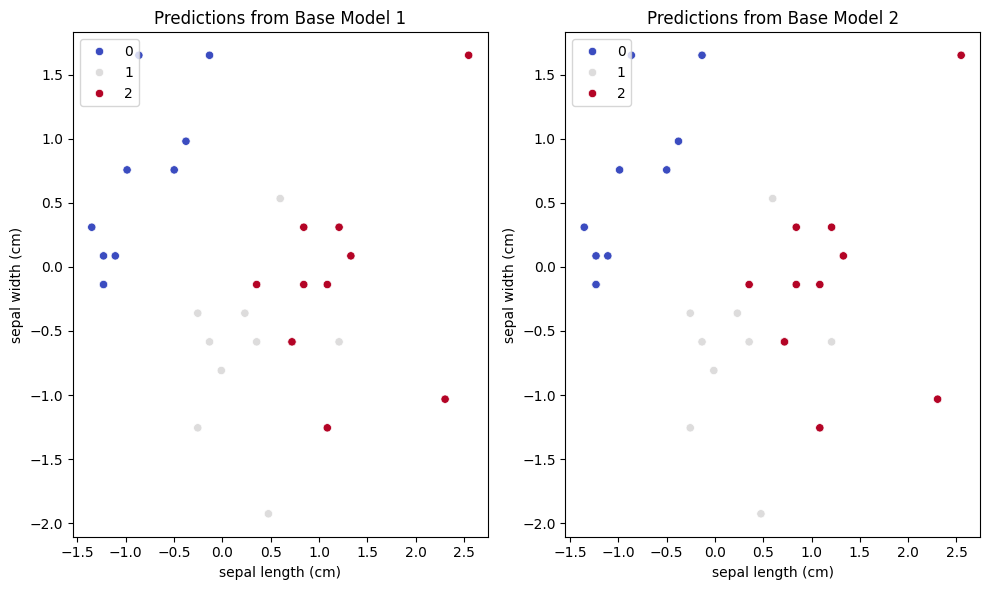

In [ ]:
# Visualize the predictions from each base model to show their individual strengths and weaknesses.
# Comparing between Decision Tree and SVC
base_model_predictions = [stack_model.named_estimators_['dt'].predict(X_test),
                          stack_model.named_estimators_['svc'].predict(X_test)]

plt.figure(figsize=(10, 6))
for i, preds in enumerate(base_model_predictions):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=preds, palette='coolwarm')
    plt.title(f"Predictions from Base Model {i + 1}")
    plt.xlabel(data.feature_names[0])
    plt.ylabel(data.feature_names[1])
plt.tight_layout()
plt.show()


In [ ]:
# Hyperparameter Tuning
# Example: Grid Search for Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters for Random Forest: {grid_search.best_params_}")

Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 150}


In [ ]:
# Model evaluation
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
rf_accuracy = accuracy_score(y_test, rf_predictions)
gb_accuracy = accuracy_score(y_test, gb_predictions)
ada_accuracy = accuracy_score(y_test, ada_predictions)
stack_accuracy = accuracy_score(y_test, stack_predictions)

print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")
print(f"AdaBoost Accuracy: {ada_accuracy:.2f}")
print(f"Stacking Accuracy: {stack_accuracy:.2f}")

Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00
AdaBoost Accuracy: 0.93
Stacking Accuracy: 1.00


In [ ]:
from sklearn.metrics import classification_report

# Example: Classification report for Random Forest and Adaboost
print("Random Forest Classification Report:\n")
print(classification_report(y_test, rf_predictions))
print("Random Forest Classification Report:\n")
print(classification_report(y_test, ada_predictions))


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

